# Image retrieval using deep features

In [1]:
!pip install turicreate

In [2]:
import turicreate

# Load some CIFAR-10 images

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#turicreate.canvas.set_target('ipynb')
turicreate.visualization.set_target(target='auto')

In [5]:
image_data = turicreate.SFrame('gdrive/My Drive/uwml/image_train_data/')

In [6]:
image_data['image']

dtype: Image
Rows: 2005
['Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Wid

# Compute deep features from our images

In [7]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_data['deep_features'] = deep_learning_model.extract_features(image_data)

In [8]:
image_data

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.242871761322,1.09545373917, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.525087952614, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.566015958786, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.12979578972, 0.0, 0.0,0.778194487095, 0.0, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.71786928177, 0.0, 0.0,0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.57818555832, 0.0, 0.0,0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.220677852631, 0.0, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0, 0.23753464222, 0.0,0.0, 0.0, 0.0, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.5737862587, 0.0, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.658935725689, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Create a nearest neighbors model to retrieve images from deep features

In [9]:
knn_model = turicreate.nearest_neighbors.create(image_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

# Use image retrieval model with deep features to find similar images

In [10]:
cat = image_data[18:19]
cat

id,image,label,deep_features,image_array
384,Height: 32 Width: 32,cat,"[1.04403531551, 0.0, 0.0,0.0, 0.0, 0.0, ...","[46.0, 45.0, 50.0, 47.0,45.0, 51.0, 45.0, 44.0, ..."


,SArray
0,

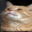

In [11]:
cat['image'].explore()

In [12]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.002ms      |

| Done         |         | 100         | 222.629ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.9403137951,2
0,39777,38.4634888975,3
0,36870,39.7559623119,4
0,41734,39.7866014148,5


In [13]:
def get_images_from_ids(query_result):
    return image_data.filter_by(query_result['reference_label'],'id')

In [14]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 7.876ms      |

| Done         |         | 100         | 234.003ms    |

+--------------+---------+-------------+--------------+

In [15]:
#cat_neighbors['image'].show()
#cat_neighbors['image'].explore()
cat_neighbors['image']

dtype: Image
Rows: 5
['Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32']

# Find images similar to a car

In [16]:
car = image_data[8:9]

,SArray
0,

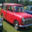

In [40]:
car['image'].explore()

,SArray
0,

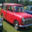

In [41]:
image_data[8:9]['image'].explore()

In [18]:
#get_images_from_ids(knn_model.query(car))['image'].explore()
get_images_from_ids(knn_model.query(car))['image']

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 11.602ms     |

| Done         |         | 100         | 228.632ms    |

+--------------+---------+-------------+--------------+

dtype: Image
Rows: 5
['Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32']

# Create a lambda function to find and show nearest neighbors to an image

In [38]:
show_neighbors = lambda i: get_images_from_ids(knn_model.query(image_data[i:i+1]))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 9.763ms      |

| Done         |         | 100         | 240.295ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

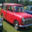
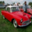
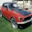
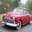
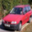

In [39]:
show_neighbors(8)

## Q1

In [23]:
sketch = turicreate.Sketch(image_data['label'])

In [24]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
| automobile |  509  |
|    cat     |  509  |
|    dog     |  509  |
|    bird    |  478  |
+------------+-------+


## Q2 & Q3

In [65]:
# Dog and cat data
dog = image_data[image_data['label'] == 'dog']
cat = image_data[image_data['label'] == 'cat']
bird = image_data[image_data['label'] == 'bird']
auto = image_data[image_data['label'] == 'automobile']

In [66]:
# KNN models
dog_model = turicreate.nearest_neighbors.create(dog,
                                               features = ['deep_features'],
                                               label = 'id')

cat_model = turicreate.nearest_neighbors.create(cat,
                                               features = ['deep_features'],
                                               label = 'id')

bird_model = turicreate.nearest_neighbors.create(bird,
                                               features = ['deep_features'],
                                               label = 'id')

auto_model = turicreate.nearest_neighbors.create(auto,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [27]:
image_test_data = turicreate.SFrame('gdrive/My Drive/uwml/image_test_data/')

,SArray
0,

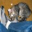

In [44]:
# First dog image
#first_test_dog = image_test_data[image_test_data['label'] == 'dog'][0:1]

# OR

# first image
first_test_image = image_test_data[0:1]

first_test_image['image'].explore()

In [37]:
cat_model.query(first_test_image)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 14.549ms     |

| Done         |         | 100         | 77.065ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.623719208,1
0,45646,36.0068799284,2
0,32139,36.5200813436,3
0,25713,36.7548502521,4
0,331,36.8731228168,5


,SArray
0,

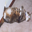

In [56]:
image_data[image_data['id'] == 16289]['image'].explore()

In [36]:
dog_model.query(first_test_image)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 14.94ms      |

| Done         |         | 100         | 74.576ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.4642628784,1
0,13387,37.5666832169,2
0,35867,37.6047267079,3
0,44603,37.7065585153,4
0,6094,38.5113254907,5


,SArray
0,

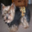

In [55]:
image_data[image_data['id'] == 16976]['image'].explore()

## Q4 & Q5

In [60]:
cat_model.query(first_test_image).join(image_data, how = 'inner', on = {'reference_label':'id'})

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 10.705ms     |

| Done         |         | 100         | 77.038ms     |

+--------------+---------+-------------+--------------+

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int
	image	Image
	label	str
	deep_features	array
	image_array	array

Rows: 5

Data:
+-------------+-----------------+---------------+------+----------------------+
| query_label | reference_label |    distance   | rank |        image         |
+-------------+-----------------+---------------+------+----------------------+
|      0      |       331       | 36.8731228168 |  5   | Height: 32 Width: 32 |
|      0      |      16289      |  34.623719208 |  1   | Height: 32 Width: 32 |
|      0      |      25713      | 36.7548502521 |  4   | Height: 32 Width: 32 |
|      0      |      32139      | 36.5200813436 |  3   | Height: 32 Width: 32 |
|      0      |      45646      | 36.0068799284 |  2   | Height: 32 Width: 32 |
+-------------+-----------------+---------------+------+----------------------+
+-------+-------------------------------+-------------------------------+
| label |         deep_features         |          image_array          |
+-------+-------------------------------+-------------------------------+
|  cat  | [0.0, 0.0, 0.510963916779,... | [45.0, 65.0, 92.0, 72.0, 9... |
|  cat  | [0.964287519455, 0.0, 0.0,... | [215.0, 219.0, 231.0, 215.... |
|  cat  | [0.536971271038, 0.0, 0.0,... | [228.0, 222.0, 236.0, 224.... |
|  cat  | [1.29409468174, 0.0, 0.0, ... | [217.0, 220.0, 205.0, 221.... |
|  cat  | [0.983677506447, 0.0, 0.0,... | [51.0, 42.0, 26.0, 56.0, 4... |
+-------+-------------------------------+-------------------------------+
[5 rows x 8 columns]

In [61]:
dog_model.query(first_test_image).join(image_data, how = 'inner', on = {'reference_label':'id'})

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 19.164ms     |

| Done         |         | 100         | 76.021ms     |

+--------------+---------+-------------+--------------+

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int
	image	Image
	label	str
	deep_features	array
	image_array	array

Rows: 5

Data:
+-------------+-----------------+---------------+------+----------------------+
| query_label | reference_label |    distance   | rank |        image         |
+-------------+-----------------+---------------+------+----------------------+
|      0      |       6094      | 38.5113254907 |  5   | Height: 32 Width: 32 |
|      0      |      13387      | 37.5666832169 |  2   | Height: 32 Width: 32 |
|      0      |      16976      | 37.4642628784 |  1   | Height: 32 Width: 32 |
|      0      |      35867      | 37.6047267079 |  3   | Height: 32 Width: 32 |
|      0      |      44603      | 37.7065585153 |  4   | Height: 32 Width: 32 |
+-------------+-----------------+---------------+------+----------------------+
+-------+-------------------------------+-------------------------------+
| label |         deep_features         |          image_array          |
+-------+-------------------------------+-------------------------------+
|  dog  | [0.470533549786, 0.0, 0.0,... | [91.0, 98.0, 71.0, 138.0, ... |
|  dog  | [0.366494178772, 0.0, 0.0,... | [255.0, 255.0, 255.0, 255.... |
|  dog  | [0.755595386028, 0.0, 0.0,... | [16.0, 17.0, 11.0, 18.0, 1... |
|  dog  | [0.305321395397, 0.0, 0.0,... | [101.0, 93.0, 9.0, 93.0, 8... |
|  dog  | [0.0, 0.0, 0.0, 0.0, 0.0, ... | [8.0, 25.0, 9.0, 29.0, 39.... |
+-------+-------------------------------+-------------------------------+
[5 rows x 8 columns]

## Q7

In [78]:
# Dog and cat data
image_test_dog = image_test_data[image_test_data['label'] == 'dog']
image_test_cat = image_test_data[image_test_data['label'] == 'cat']
image_test_bird = image_test_data[image_test_data['label'] == 'bird']
image_test_auto = image_test_data[image_test_data['label'] == 'automobile']

In [83]:
# Model query
dog_dog_nn = dog_model.query(image_test_dog, k = 1)
dog_cat_nn = cat_model.query(image_test_dog, k = 1)
dog_bird_nn = bird_model.query(image_test_dog, k = 1)
dog_auto_nn = auto_model.query(image_test_dog, k = 1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 711.961ms    |

| Done         | 509000  | 100         | 712.998ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 721.923ms    |

| Done         | 509000  | 100         | 723.239ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 239000  | 50          | 655.759ms    |

| Done         | 478000  | 100         | 665.635ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 254000  | 49.9018     | 707.733ms    |

| Done         | 509000  | 100         | 709.963ms    |

+--------------+---------+-------------+--------------+

In [84]:
dog_dog_nn

query_label,reference_label,distance,rank
0,49803,33.4773590373,1
1,5755,32.8458495684,1
2,20715,35.0397073189,1
3,13387,33.9010327697,1
4,12089,37.4849250909,1
5,6094,34.945165344,1
6,3431,39.0957278345,1
7,6184,37.7696131032,1
8,2167,35.1089144603,1
9,7776,43.2422832585,1


In [85]:
dog_distance = turicreate.SFrame({
    'dog_dog':dog_dog_nn['distance'],
    'dog_cat':dog_cat_nn['distance'],
    'dog_bird':dog_bird_nn['distance'],
    'dog_auto':dog_auto_nn['distance']
    })

In [86]:
dog_distance

dog_auto,dog_bird,dog_cat,dog_dog
41.9579761457,41.7538647304,36.4196077068,33.4773590373
46.0021331807,41.3382958925,38.8353268874,32.8458495684
42.9462290692,38.6157590853,36.9763410854,35.0397073189
41.6866060048,37.0892269954,34.5750072914,33.9010327697
39.2269664935,38.272288694,34.778824791,37.4849250909
40.5845117698,39.1462089236,35.1171578292,34.945165344
45.1067352961,40.523040106,40.6095830913,39.0957278345
41.3221140974,38.1947918393,39.9036867306,37.7696131032
41.8244654995,40.1567131661,38.0674700168,35.1089144603
45.4976929401,45.5597962603,42.7258732951,43.2422832585


In [95]:
row_1 = dog_distance[0]['dog_dog']
row_1

33.47735903726335

In [91]:
min(dog_distance[0]['dog_auto'],dog_distance[0]['dog_bird'],dog_distance[0]['dog_cat'])

36.419607706754384

In [93]:
if dog_distance[0]['dog_dog'] < min(dog_distance[0]['dog_auto'],dog_distance[0]['dog_bird'],dog_distance[0]['dog_cat']):
  print(1)
else:
  print(0)

1


In [105]:
def dog_correct(row):
  if row['dog_dog'] < min(row['dog_auto'],row['dog_bird'],row['dog_cat']):
    x = 1
  else:
    x = 0
  return x

In [107]:
dog_correct(dog_distance[0])


1

In [109]:
correct = dog_distance.apply(dog_correct)
correct

dtype: int
Rows: 1000
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ... ]

In [114]:
correct.sum()

678